In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!',
          'Queen enjoys rain',
          'Man likes to eat good food',
          'Some Woman are afraid of animals'
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals','weather','food','animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus,
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals
8,Queen enjoys rain,weather
9,Man likes to eat good food,food


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick', 'queen enjoys rain',
       'man likes eat good food', 'woman afraid animals'], dtype='<U51')

In [4]:
import nltk
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality
window_context = 4  # Context window size
min_word_count = 1   # Minimum word count
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus,vector_size=feature_size,
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample,  epochs=5000)
w2v_model

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


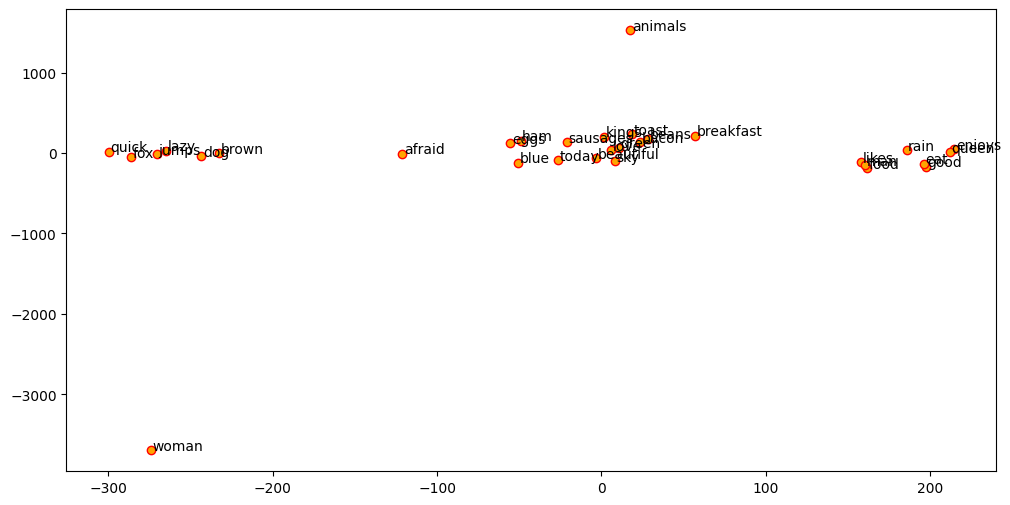

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [6]:
w2v_model.wv['sky'], w2v_model.wv['sky'].shape

(array([-0.38160232,  0.5892687 ,  2.0423453 , -0.17496149, -0.82804286,
        -0.60234904,  1.2970147 ,  0.41869286, -0.24069633, -0.5594527 ,
         0.2928828 ,  1.1835623 , -0.33664116,  0.09478124, -0.03686948],
       dtype=float32),
 (15,))

In [7]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sky,-0.381602,0.589269,2.042345,-0.174961,-0.828043,-0.602349,1.297015,0.418693,-0.240696,-0.559453,0.292883,1.183562,-0.336641,0.094781,-0.036869
blue,-0.138045,0.512744,1.136479,-0.893783,-1.031977,0.001836,1.097164,0.340778,0.484382,0.388042,-0.252150,0.990003,0.401992,-0.437746,0.150189
beautiful,-0.576113,0.410063,1.709790,-0.323992,-0.675326,-0.450336,1.461126,-0.033899,-0.125671,-0.732108,-0.192695,0.943160,-0.725855,-0.193599,0.011267
quick,-0.735510,0.330487,0.884778,-0.356619,0.391197,-0.244708,-0.045765,0.067211,0.933403,0.505371,0.136976,1.950093,-0.157937,-0.547838,1.575100
brown,-0.467898,0.348957,0.556639,-0.983837,-0.248483,0.109598,-0.194322,0.226591,0.530801,0.256867,0.227378,1.981957,-0.097890,-0.893175,1.206760
fox,-0.261442,0.836433,0.630933,-1.025272,-0.105809,-0.086556,-0.223553,0.410688,1.100115,-0.357322,0.203247,1.776284,0.097190,-0.554005,1.419826
lazy,-0.631424,0.510428,0.883316,-0.521901,0.403127,0.184764,-0.224815,0.009540,0.643396,0.383740,-0.025908,2.006396,0.133897,-0.365613,1.567969
dog,-0.660964,0.423012,0.864754,-0.622409,-0.223344,-0.179831,-0.187715,0.093569,0.994184,0.162146,0.398803,1.924572,0.280792,-0.640161,1.145048
bacon,0.182747,-0.212641,1.890364,-1.007491,1.095705,-0.189647,0.173631,0.654651,-0.282801,0.279867,0.478972,-0.346308,-0.115091,-0.933531,0.282650
love,0.438406,0.111214,1.796298,0.061964,0.436870,-0.303435,0.712488,0.175549,-0.180687,-0.191548,0.194686,0.190581,-0.250985,-0.208108,-0.066394


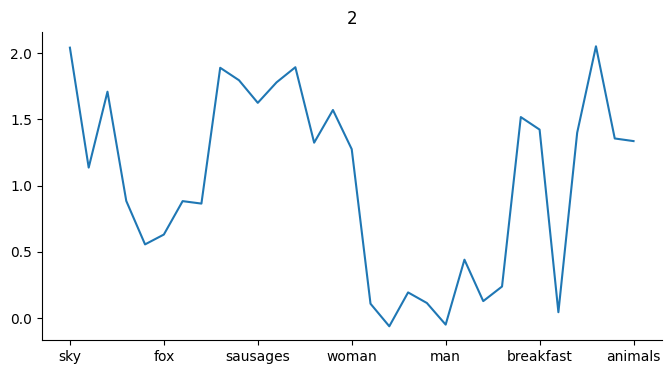

In [15]:
# @title 2

from matplotlib import pyplot as plt
vec_df[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,sky,blue,beautiful,quick,brown,fox,lazy,dog,bacon,love,...,jumps,rain,enjoys,kings,breakfast,queen,today,green,afraid,animals
sky,1.000000,0.735649,0.943412,0.410240,0.415375,0.427671,0.380532,0.478555,0.361251,0.741546,...,0.287343,0.210151,0.284655,0.250174,0.251666,0.238396,0.953543,0.564176,0.349539,0.390973
blue,0.735649,1.000000,0.707503,0.521010,0.630124,0.600756,0.524145,0.643006,0.294265,0.428394,...,0.571461,0.254157,0.292471,0.074509,0.275601,0.198121,0.760362,0.312858,0.202008,0.197136
beautiful,0.943412,0.707503,1.000000,0.395078,0.398868,0.394824,0.353610,0.427488,0.323885,0.691479,...,0.254792,0.276787,0.330396,0.223226,0.257434,0.367914,0.953044,0.528470,0.370305,0.377260
quick,0.410240,0.521010,0.395078,1.000000,0.909950,0.877558,0.971439,0.942532,0.298612,0.257372,...,0.923077,0.372717,0.295017,0.244155,0.302871,0.377466,0.334814,0.229211,0.371013,0.313278
brown,0.415375,0.630124,0.398868,0.909950,1.000000,0.926516,0.920642,0.950545,0.276052,0.152849,...,0.953500,0.409145,0.384022,0.173104,0.271677,0.376933,0.359787,0.175773,0.358677,0.344971
fox,0.427671,0.600756,0.394824,0.877558,0.926516,1.000000,0.893108,0.937660,0.246783,0.182822,...,0.946743,0.283824,0.309666,0.234323,0.246483,0.282163,0.397006,0.110590,0.380357,0.400629
lazy,0.380532,0.524145,0.353610,0.971439,0.920642,0.893108,1.000000,0.933473,0.275425,0.221231,...,0.934178,0.456898,0.412366,0.233429,0.273044,0.444259,0.311213,0.193766,0.418421,0.367441
dog,0.478555,0.643006,0.427488,0.942532,0.950545,0.937660,0.933473,1.000000,0.250009,0.214457,...,0.951244,0.321614,0.306445,0.166882,0.256543,0.291779,0.415288,0.175649,0.449515,0.431286
bacon,0.361251,0.294265,0.323885,0.298612,0.276052,0.246783,0.275425,0.250009,1.000000,0.739087,...,0.301897,0.307667,0.269921,0.900172,0.862270,0.238758,0.286422,0.843735,0.327062,0.361857
love,0.741546,0.428394,0.691479,0.257372,0.152849,0.182822,0.221231,0.214457,0.739087,1.000000,...,0.104129,0.199342,0.219432,0.615726,0.559575,0.197189,0.672905,0.850901,0.274278,0.311947


In [9]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]],
                    axis=1)

,0
sky,"[today, beautiful, love]"
blue,"[today, sky, beautiful]"
beautiful,"[today, sky, blue]"
quick,"[lazy, dog, jumps]"
brown,"[jumps, dog, fox]"
fox,"[jumps, dog, brown]"
lazy,"[quick, jumps, dog]"
dog,"[jumps, brown, quick]"
bacon,"[beans, sausages, kings]"
love,"[green, ham, sky]"


In [10]:
import numpy as np
def euclidian_distance(x,y):
  return np.sqrt(np.sum((x-y)**2))


In [18]:
queen = vec_df.loc["eggs"].values
king = vec_df.loc["animals"].values
man = vec_df.loc["enjoys"].values
woman = vec_df.loc["beautiful"].values
food = vec_df.loc["afraid"].values

In [19]:
queen

array([-0.20156947,  0.08135667,  1.8945718 , -0.8125851 ,  1.2514204 ,
       -0.3018856 ,  0.47117558,  0.15171024,  0.01885597, -0.30769157,
       -0.4553468 , -0.54485345, -0.00296747, -1.2876956 , -0.07255848],
      dtype=float32)

In [20]:
euclidian_distance(king+woman-man, queen)

4.221693

In [21]:
euclidian_distance(king+woman-man, food)

3.5591023